# Classifiers

### Table of Contents

* [Logistic Regression](#logistic_regression)
* [SoftMax](#softmax)
* [Decision Tree](#decision_tree)
    * [Regularization](#dt_regularization)
* [Regression Tree](#regression_tree)
* [Ensamble Classifiers](#ensamble_classifiers)
    * [Bagging](#bagging)
    * [Random Forests](#random_forest)
    * [Gradient Boosting](#gradient_boosting)
    * [XGboost](#xgboost)
* [Support Vectors Machines](#svm)
    * [Non Linear (Kernel) SVM](#non_linear_svm)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
# inline plot 
%matplotlib inline  
# default figure size 
matplotlib.rcParams['figure.figsize'] = (20, 10)
# to make our sets reproducible 
np.random.seed(42) 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Logistic regression <a class="anchor" id="logistic_regression"></a>

In [3]:
## Iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print(f'''
fetaures names: {iris.feature_names}
labels: {list(enumerate(iris.target_names))}
number of samples {iris.data.shape[0]}
''')
    


fetaures names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels: [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]
number of samples 150



In [5]:
# single feature and binary label
X = iris["data"][:, 3:]  # only petal width feature
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [6]:
X.shape

(150, 1)

In [7]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

(0.0, 3.0, -0.02, 1.02)

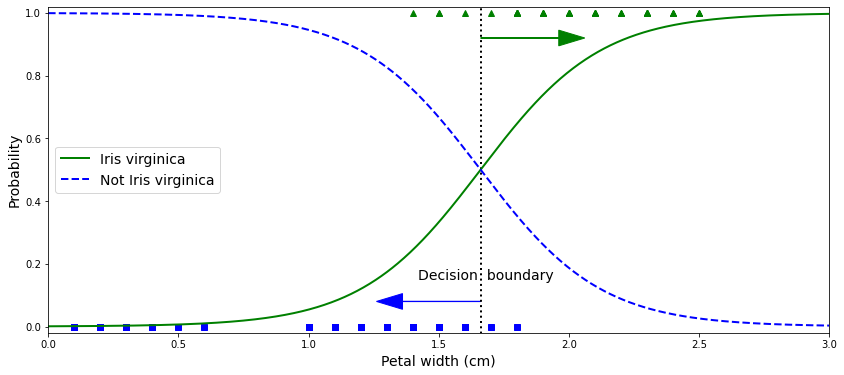

In [8]:
###############################################
# show probabilty curve and decision boundary #
###############################################

# take a grid to plot the probabilities and decision boundary
X_grid = np.linspace(0, 3, 1000).reshape(-1, 1)
y_grid_proba = log_reg.predict_proba(X_grid)
decision_boundary = X_grid[y_grid_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(14, 6))

# negative examples
plt.plot(X[y==0], y[y==0], "bs")
# plot positive examples
plt.plot(X[y==1], y[y==1], "g^")
# take the smallest example for which the assigned label is 1 (i.e. score >= 0.5)
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_grid, y_grid_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_grid, y_grid_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])


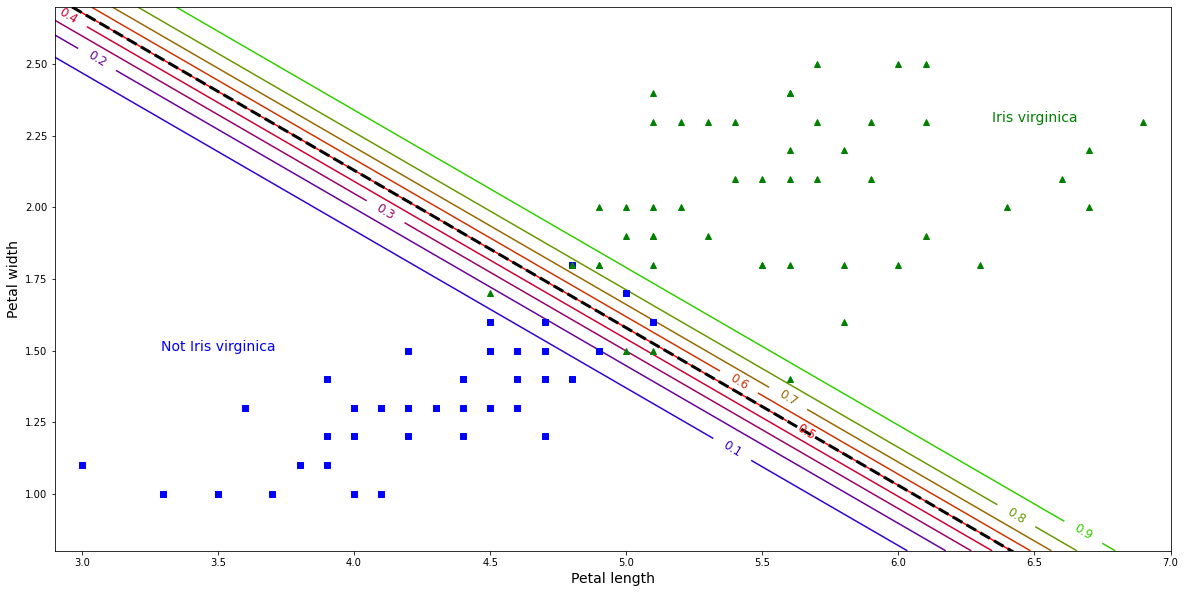

In [9]:
from sklearn.linear_model import LogisticRegression

# taking two features 
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# C is for Inverse of regularization strength
# smaller values specify stronger regularization.

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

# generate mesh of points for prediction
# then predict and plot
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_grid_proba = log_reg.predict_proba(X_grid)
zz = y_grid_proba[:, 1].reshape(x0.shape)

# plt.figure(figsize=(10, 4))
# plot positive and negative examples
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

# plot the contours (gets a mapping and plots equal valued contours)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels=10)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Softmax <a class="anchor" id="softmax"></a>

In [10]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# If multi_class='ovr' (one versus rest), then a binary problem is fit for each label.
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

(0.0, 7.0, 0.0, 3.5)

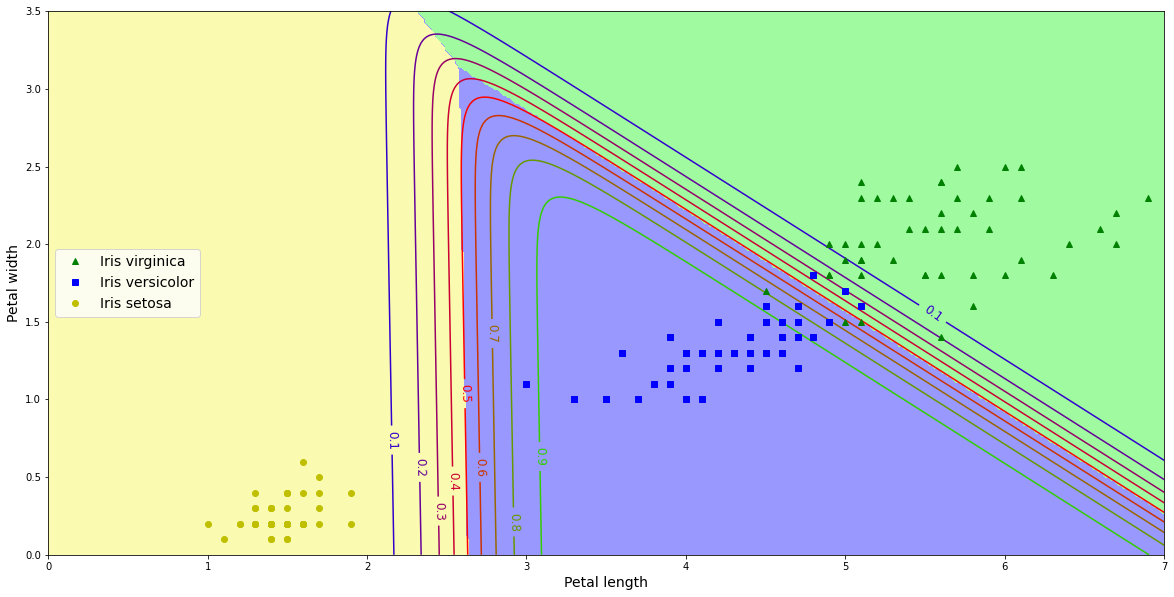

In [11]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

# use only two features petal length (cm) & petal width (cm)
X_grid = np.c_[x0.ravel(), x1.ravel()]
y_grid_proba = softmax_reg.predict_proba(X_grid)
y_predict = softmax_reg.predict(X_grid)

# the scores for class 1 
zz1 = y_grid_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg, levels=10)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])


## Decision trees  <a class="anchor" id="decision_tree"></a>

In [18]:
from os.path import expanduser
IMAGES_PATH = expanduser('~/PycharmProjects/orly_hw2/tutorials/images')

In [19]:
#######################
#  utility functions  #
#######################

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Tree Specification

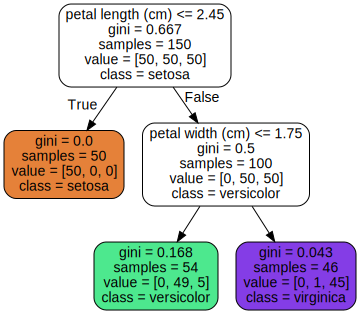

In [21]:
from graphviz import Source
from sklearn.tree import export_graphviz

# save the 
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### The decision boundary of a Descision tree

Text(4.05, 0.5, '(Depth=2)')

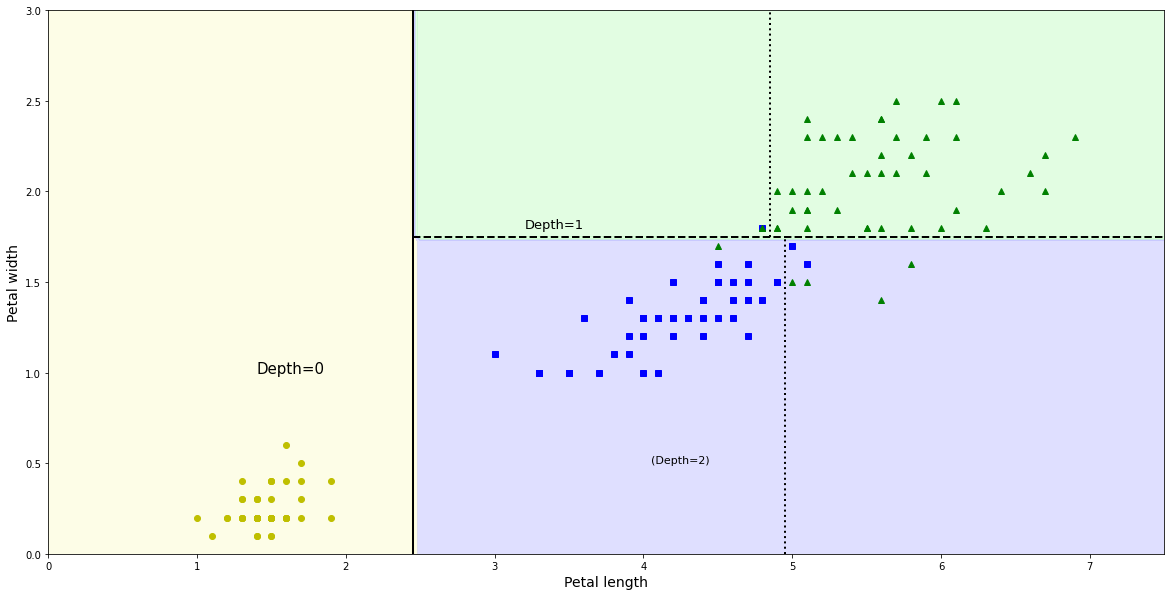

In [22]:

        
# plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


In [23]:
sample_features = [[5, 1.5]]

class_probs = '\n'.join([f'{class_i}:{prob}' for class_i, prob in enumerate(tree_clf.predict_proba(sample_features)[0])])

print(f"""
probabilities for each class: 
{class_probs}
predicted class: {tree_clf.predict(sample_features)[0]}
""")


probabilities for each class: 
0:0.0
1:0.9074074074074074
2:0.09259259259259259
predicted class: 1



In [24]:
# moons dataset - Make two interleaving half circles.
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)



## Regularization <a class="anchor" id="dt_regularization"></a>

Text(0, 0.5, '')

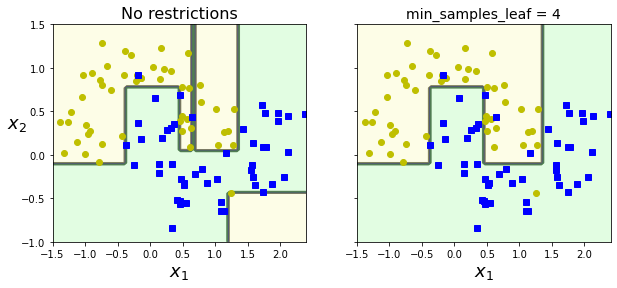

In [25]:
############################
#  bounding the leaf size  #
############################

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# require at least 4 samples to form a node
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")


## Regression Trees <a class="anchor" id="regression_tree"></a>

In [26]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10


In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Text(0.5, 1.0, 'max_depth=3')

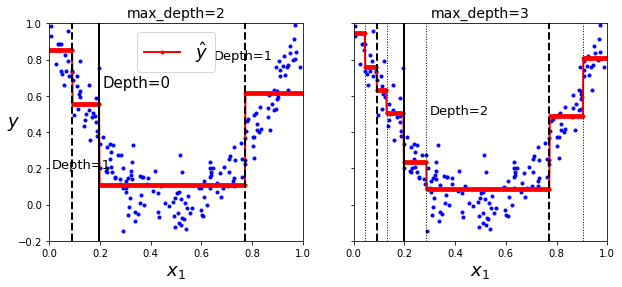

In [28]:
from sklearn.tree import DecisionTreeRegressor

# regularize by the maximal depth
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


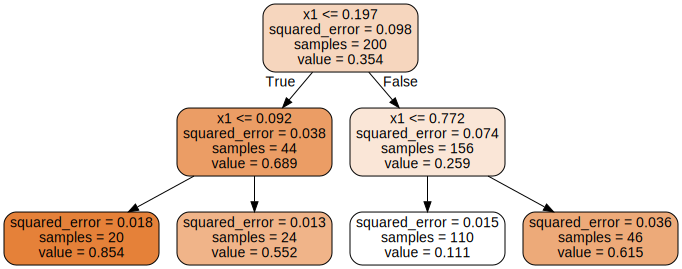

In [29]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))


## Ensamble Classifiers <a class="anchor" id="ensamble_classifiers"></a>

In [31]:
from matplotlib.colors import ListedColormap

######################
# Utilitiy functions #
######################

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Bagging <a class="anchor" id="bagging"></a>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# create data
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Accuracy Bagging: 0.904
OOB score 0.9253333333333333
Accuracy Single Tree: 0.856
OOB score 0.9253333333333333


Text(0, 0.5, '')

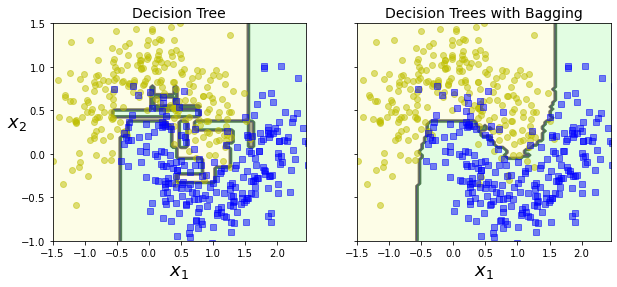

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), # week learner
    n_estimators=500, # number of learners to train 
    max_samples=100,  # The number of samples to draw from X to train each base estimator
    bootstrap=True,  # Whether features are drawn with replacement
    random_state=42, # so we can replicate the results,
    oob_score=True # Whether to use out-of-bag samples to estimate the generalization error
)


bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f'Accuracy Bagging: {accuracy_score(y_test, y_pred)}')
print(f'''OOB score {bag_clf.oob_score_}''')


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(f'Accuracy Single Tree: {accuracy_score(y_test, y_pred_tree)}')
print(f'''OOB score {bag_clf.oob_score_}''')

#######################
# Decision Boundaries #
#######################

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")


## Random Forests <a class="anchor" id="random_forest"></a>

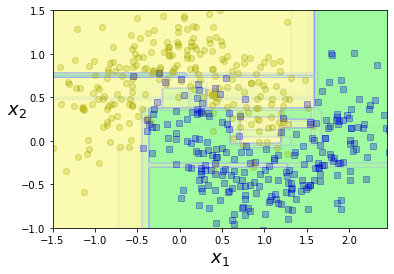

In [35]:
plt.figure(figsize=(6, 4))

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for i in range(15):
    
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    # bootstrap
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    # fit the model
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)



In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for name, score in sorted(zip(iris.feature_names, rnd_clf.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f'feature: {name} importance score: {score}')


feature: petal length (cm) importance score: 0.4410304643639577
feature: petal width (cm) importance score: 0.4233579963547682
feature: sepal length (cm) importance score: 0.11249225099876375
feature: sepal width (cm) importance score: 0.02311928828251033


## Gradient Boosting <a class="anchor" id="gradient_boosting"></a>

In [37]:
# Utility function

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    

In [38]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

Text(0.5, 0, '$x_1$')

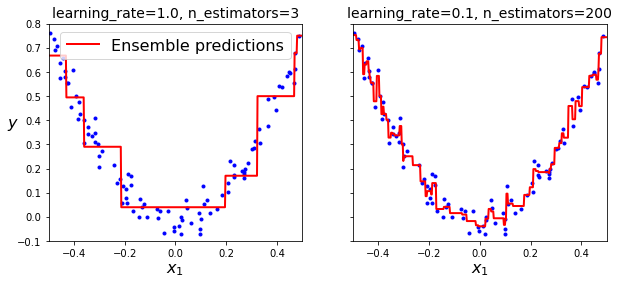

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# high learning rate with few trees
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

# slow learning rate with more trees
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)


### Early Stopping Regularization
1. find the best among 120 estimators
2. stop if there is no improvement after 5 attempts

Text(0.5, 0, '$x_1$')

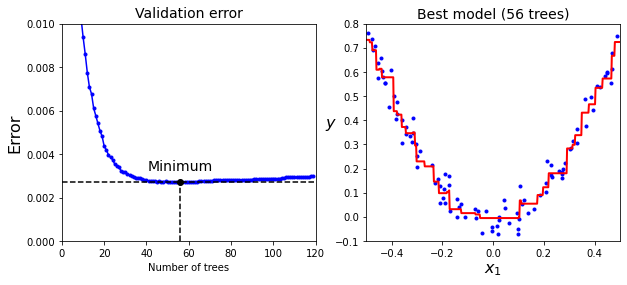

In [41]:
# Gradient boosting with early stopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# staged_predict: Predict regression target at each stage for X.
# This method allows monitoring (i.e. determine error on testing set) after each stage.
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

# find the index of the minimal errors
bst_n_estimators = np.argmin(errors) + 1
min_error = np.min(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)



In [42]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping
            
print(f'Number of trees {gbrt.n_estimators}')
print("Minimum validation MSE:", min_val_error)


Number of trees 61
Minimum validation MSE: 0.002712853325235463


### XGBoost <a class="anchor" id="xgboost"></a>

In [43]:
!pip install xgboost
# Documentation
# https://xgboost.readthedocs.io/en/latest/install.html#python

     |████████████████████████████████| 1.3 MB 716 kB/s            


In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred, squared=False)  
print("Validation MSE:", val_error)            

## Support Vectors Machine <a class="anchor" id="svm"></a>

In [108]:
## Utility functions

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    # plot the margines 
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    
    # get support vectors
    svs = svm_clf.support_vectors_
    print(f'''Support vectors: 
    {list(svs)}
    ''')
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


In [92]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Binary label
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Support vectors: 
    [array([1.9, 0.4]), array([3. , 1.1])]
    


(0.0, 5.5, 0.0, 2.0)

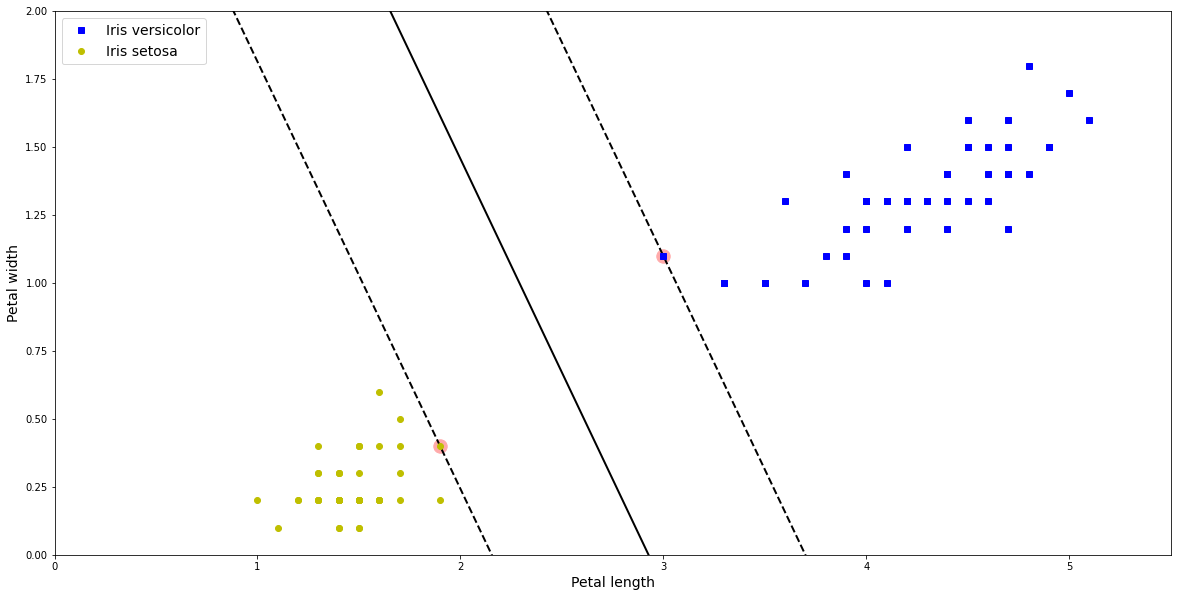

In [102]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

In [ ]:
## Large margin vs margin violations

Support vectors: 
    [array([4.5, 1.5]), array([4.9, 1.5]), array([4.6, 1.5]), array([4.7, 1.6]), array([4.5, 1.5]), array([4.5, 1.5]), array([4.8, 1.8]), array([4.9, 1.5]), array([4.8, 1.4]), array([5. , 1.7]), array([4.5, 1.5]), array([5.1, 1.6]), array([4.5, 1.5]), array([4.5, 1.6]), array([4.7, 1.5]), array([5.1, 1.9]), array([4.5, 1.7]), array([5.5, 1.8]), array([5. , 1.5]), array([4.9, 1.8]), array([4.8, 1.8]), array([4.9, 1.8]), array([5.8, 1.6]), array([5.1, 1.5]), array([5.6, 1.4]), array([5.5, 1.8]), array([4.8, 1.8]), array([5.1, 1.9]), array([5. , 1.9]), array([5.1, 1.8])]
    
Support vectors: 
    [array([4.9, 1.5]), array([4.7, 1.6]), array([4.8, 1.8]), array([4.9, 1.5]), array([5. , 1.7]), array([5.1, 1.6]), array([4.5, 1.7]), array([5. , 1.5]), array([4.8, 1.8]), array([5.1, 1.5]), array([4.8, 1.8])]
    


(4.0, 5.9, 0.8, 2.8)

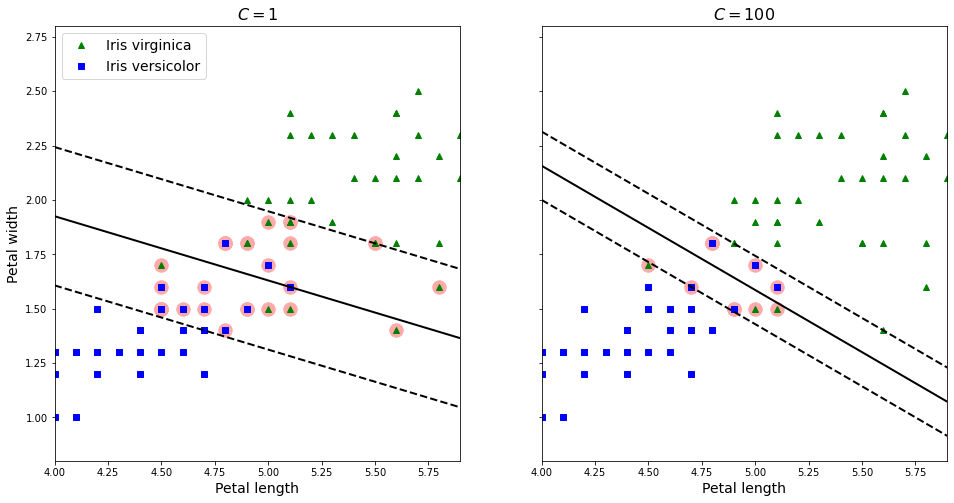

In [107]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)


# Convert to unscaled parameters
w1 = svm_clf1.coef_[0] / scaler.scale_
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])

w2 = svm_clf2.coef_[0] / scaler.scale_
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
# here we transform y to be in {-1, 1}
t = y * 2 - 1
# detect all points that reside in the margin
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(16,8), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


## Non-linear SVM (kernel) <a class="anchor" id="non_linear_svm"></a>

In [115]:
# Utility function


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

    

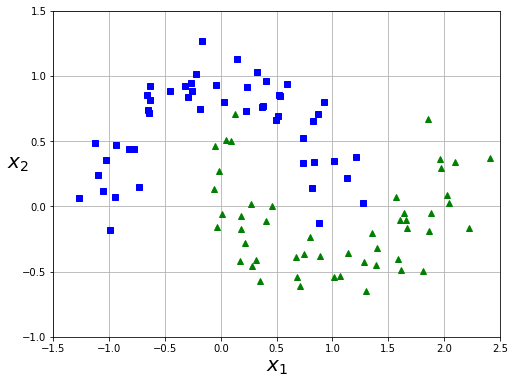

In [112]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plt.figure(figsize=(8,6))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

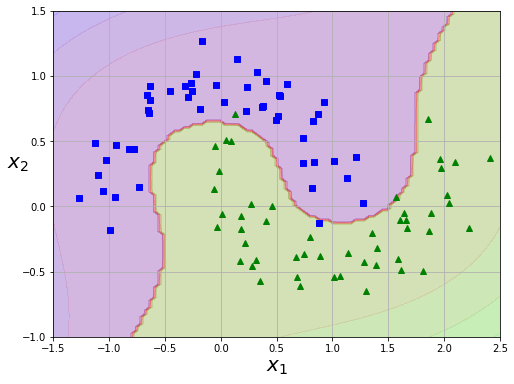

In [114]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

plt.figure(figsize=(8,6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


Text(0, 0.5, '')

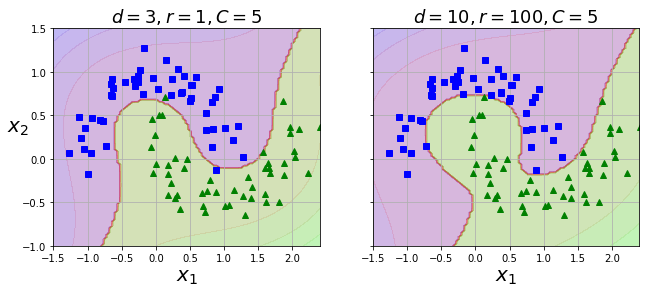

In [118]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)


fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")


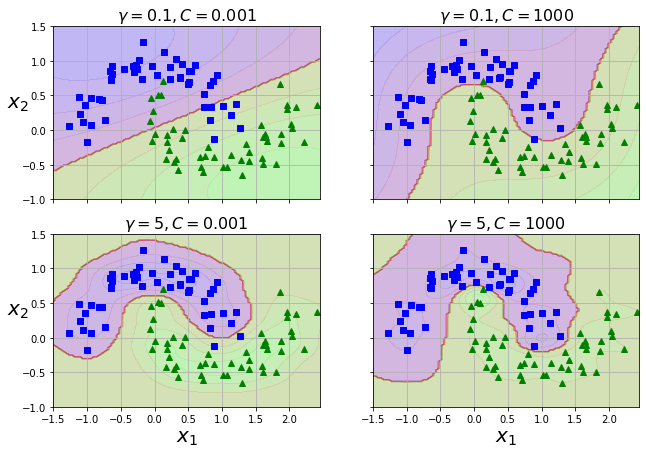

In [119]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
